In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [31]:
# Utility for displaying our DataFrames
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [32]:
from datetime import date, datetime

def calculate_age(born):
    today = date.today()
    if born in ['---', '']:
        return ''
    born = datetime.strptime(born, '%Y-%m-%d')
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

np_age = np.vectorize(calculate_age)

In [100]:
def concat(col1, col2, debug=False):
    prohibited = ['', '---', 'nan']
    if col1 not in prohibited:
        return col1
    elif col2 not in prohibited:
        return col2
    else:
        return ''

np_concat = np.vectorize(concat)

In [123]:
def age_concat(col1, col2):
    prohibited = ['', '---', 'nan']
    col1 = 0 if col1 in prohibited else float(col1)
    col2 = 0 if col2 in prohibited else float(col2)
    col1 = 0 if np.isnan(col1) else col1
    col2 = 0 if np.isnan(col2) else col2
    return col1 if col1 != 0 else col2

np_age_concat = np.vectorize(age_concat)

In [151]:
def lat(col):
    try:
        return float(col.split(' ')[0])
    except:
        return 0
get_lat = np.vectorize(lat)

def lng(col):
    try:
        return float(col.split(' ')[1])
    except:
        return 0
get_lng = np.vectorize(lng)

In [155]:
unclean = pd.read_csv('../match-data/uncleaned_intakes.csv')
clean = pd.DataFrame()

unclean.replace(['---'], '')

# Clean Nationality
unclean['form.int.nation'] = unclean['form.int.nation'].replace(['1'], 'jordanian')
unclean['form.int.nation'] = unclean['form.int.nation'].replace(['2'], 'syrian')
unclean['form.int.nation'] = unclean['form.int.nation'].replace(['---'], '')

unclean['form.int.nationality'] = unclean['form.int.nationality'].replace(['---'], '')
clean['nationalty'] = unclean['form.int.nationality'].map(str) + unclean['form.int.nation']
clean['nationality'] = clean['nationalty'].replace([''], 'unknown')

# Clean Gender
unclean['form.dem.male'] = unclean['form.dem.male'].replace(['0'], 'female')
unclean['form.dem.male'] = unclean['form.dem.male'].replace(['1'], 'male')
unclean['form.dem.male'] = unclean['form.dem.male'].replace(['---'], '')
unclean['form.dem.gender'] = unclean['form.dem.gender'].replace(['---'], '')
clean['gender'] = unclean['form.dem.gender'].map(str) + unclean['form.dem.male']

# Clean Education Level
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['1'], 'none')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['2'], 'primary')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['3'], 'secondary')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['4'], 'college')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['5'], 'diploma')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['6'], 'bachelors')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['7'], 'masters')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['7'], 'doctorate')
unclean['form.ed.edu1'] = unclean['form.ed.edu1'].replace(['---'], '')
unclean['form.ed.highest_edu_level'] = unclean['form.ed.highest_edu_level'].replace(['---'], '')
clean['edu'] = unclean['form.ed.edu1'].map(str) + unclean['form.ed.highest_edu_level']

# Clean Age
unclean['form.dem.age'] = unclean['form.dem.age'].replace(['---'], '')
unclean['form.dem.age_calc'] = unclean['form.dem.age_calc'].replace(['---'], '')
unclean['dob_age'] = np_age(unclean['form.dem.dob'])


unclean['age_concat'] = np_age_concat(unclean['form.dem.age'], unclean['form.dem.age_calc'])
clean['age'] = np_age_concat(unclean['age_concat'], unclean['dob_age'])

# Clean Night Shfit
unclean['form.jp.night'] = unclean['form.jp.night'].replace(['---'], '')
unclean['form.jp.will_work_night_shift'] = unclean['form.jp.will_work_night_shift'].replace(['---'], '')
clean['night-shift'] = np_concat(unclean['form.jp.night'], unclean['form.jp.will_work_night_shift'])

clean['lat'] = get_lat(unclean['form.id.gps'])
clean['lng'] = get_lng(unclean['form.id.gps'])

clean

,nationalty,nationality,gender,edu,age,night-shift,lat,lng
0,syrian,syrian,female,secondary,48.0,0,32.563414,35.827438
1,syrian,syrian,male,secondary,0.0,1,32.563815,35.824147
2,syrian,syrian,male,primary,44.0,1,32.572771,35.801459
3,syrian,syrian,female,secondary,28.0,0,32.572456,35.801790
4,syrian,syrian,female,diploma,40.0,0,32.538780,35.848598
5,syrian,syrian,female,primary,0.0,0,32.553917,35.804415
6,syrian,syrian,female,none,53.0,0,0.000000,0.000000
7,syrian,syrian,female,secondary,20.0,0,32.505371,35.863854
8,syrian,syrian,female,secondary,19.0,0,32.538697,35.848594
9,syrian,syrian,female,bachelors,25.0,0,32.506566,35.888420


[]

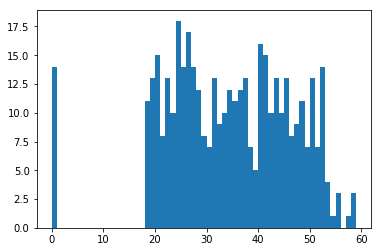

In [156]:
clean_age = clean['age'].replace([np.nan], -1).map(int)
plt.hist(clean_age, bins=range(min(clean_age), max(clean_age)))
plt.plot()

In [157]:
clean.to_csv('../match-data/clean_all.csv')